In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.shape

(1338, 7)

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
nu=df.isnull().sum()
nu_v=nu[nu>0]
nu_v

Series([], dtype: int64)

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [5]:
num_cols=df.dtypes[df.dtypes!=object].index
cat_cols=df.dtypes[df.dtypes==object].index
print(num_cols)
print(cat_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


In [ ]:
EDA

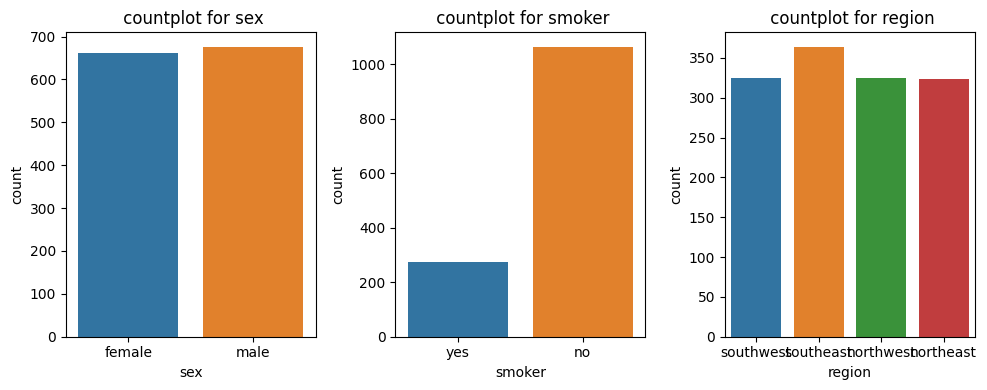

In [6]:
plt.figure(figsize=(10,4))
for i in range(len(cat_cols)):
    plt.subplot(1,3,i+1)
    sns.countplot(x=df[cat_cols[i]])
    plt.title(f" countplot for { cat_cols[i]}")
plt.tight_layout()
plt.show()

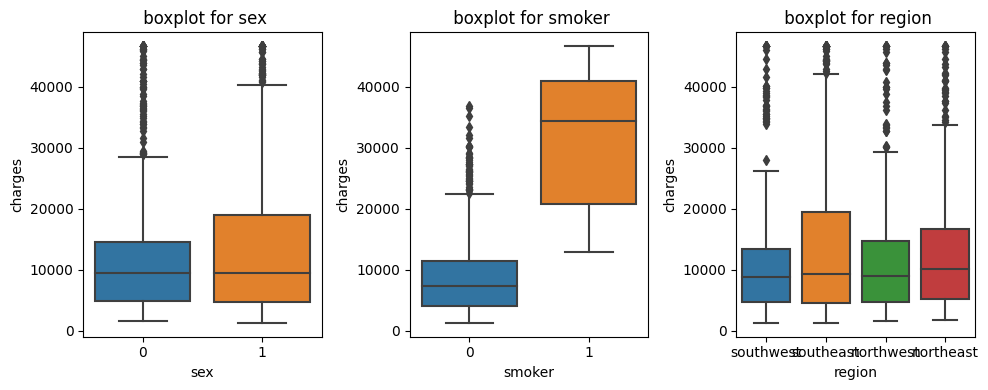

In [40]:
plt.figure(figsize=(10,4))
for i in range(len(cat_cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=df[cat_cols[i]],y=df['charges'])
    plt.title(f" boxplot for { cat_cols[i]}")
plt.tight_layout()
plt.show()

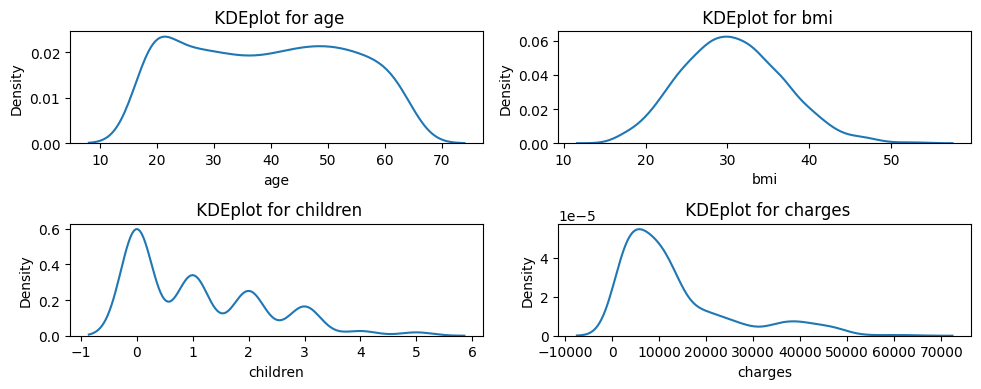

In [31]:
plt.figure(figsize=(10,4))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[num_cols[i]])
    plt.title(f" KDEplot for { num_cols[i]}")
plt.tight_layout()
plt.show()

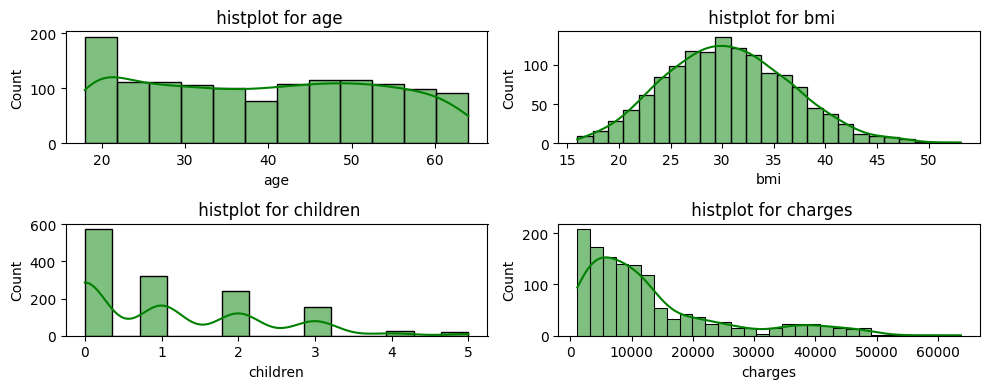

In [46]:
plt.figure(figsize=(10,4))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=df[num_cols[i]],kde=True,color='green')
    plt.title(f" histplot for { num_cols[i]}")
plt.tight_layout()
plt.show()

In [ ]:
Correlation

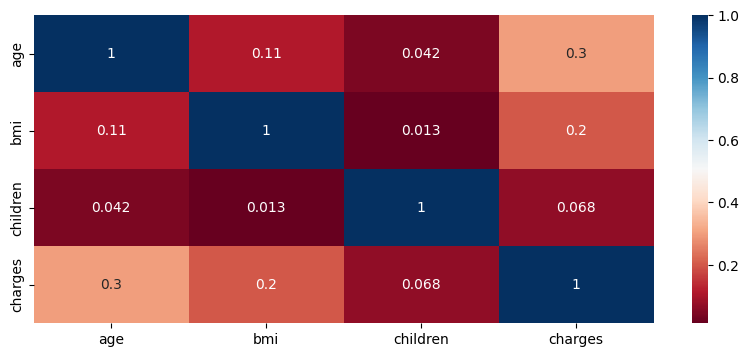

In [4]:
corr=df[num_cols].corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()


In [ ]:
####outlier

In [7]:
a= df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a=a.iloc[:,3:]
a


,min,1%,2%,5%,50%,95%,98%,99%,max
age,18.0000,18.00000,18.00000,18.0000,39.000,62.000000,63.000000,64.000000,64.00000
bmi,15.9600,17.89515,19.27140,21.2560,30.400,41.106000,43.918600,46.407900,53.13000
children,0.0000,0.00000,0.00000,0.0000,1.000,3.000000,4.000000,5.000000,5.00000
charges,1121.8739,1252.97273,1621.74165,1757.7534,9382.033,41181.827787,46676.189821,48537.480726,63770.42801


In [12]:
df['children'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64>

In [8]:
print(df[df['charges']>46676.189821].shape)
print(df[df['charges']<1252.97273].shape)


(27, 7)
(14, 7)


In [6]:
df['charges']=np.where(df['charges']>46676.189821,46676,df['charges'])
df['charges']=np.where(df['charges']< 1252.97273,1252.97273,df['charges'])


In [ ]:
Encoding categorical variable

In [8]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [10]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
lb=LabelEncoder()
for i in ['sex','smoker']:
    df[i]=lb.fit_transform(df[i])

In [45]:
df['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [46]:
df_dum=pd.get_dummies(data=df,columns=['region'],drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(1338, 9)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [47]:
x=df_dum.drop('charges',axis=1)
y=df_dum['charges']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1003, 8)
(335, 8)
(1003,)
(335,)


In [50]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    res=pd.DataFrame({'Train_score':train_score,'Test_score':test_score,'MAE':mae,'MSE':mse,'RMSE':rmse},index=[mname])
    return res

In [53]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [54]:
lr=LinearRegression()
lr_res=eval_model(lr,x_train,y_train,x_test,y_test,'Linear Regression')
lr_res

,Train_score,Test_score,MAE,MSE,RMSE
Linear Regression,0.744956,0.767264,4243.654117,3.511776e+07,5926.023602


In [18]:
rid=Ridge(alpha=7)
rid_res=eval_model(rid,x_train,y_train,x_test,y_test,'Ridge')
rid_res


,Train_score,Test_score,MAE,MSE,RMSE
Ridge,0.751207,0.767334,4260.814059,3.385269e+07,5818.306107


In [19]:
las=Lasso(alpha=7)
las_res=eval_model(las,x_train,y_train,x_test,y_test,'Lasso')
las_res


,Train_score,Test_score,MAE,MSE,RMSE
Lasso,0.752265,0.770098,4174.98107,3.345051e+07,5783.64173


In [55]:
dt=DecisionTreeRegressor(max_depth=7,min_samples_split=22,random_state=30)
dt_res=eval_model(dt,x_train,y_train,x_test,y_test,'Decision Tree')
dt_res


,Train_score,Test_score,MAE,MSE,RMSE
Decision Tree,0.89633,0.824321,2832.91609,2.650847e+07,5148.637268


In [21]:
rf=RandomForestRegressor(n_estimators=15,max_depth=7,min_samples_split=22)
rf_res=eval_model(rf,x_train,y_train,x_test,y_test,'Random Forest')
rf_res


,Train_score,Test_score,MAE,MSE,RMSE
Random Forest,0.894623,0.862077,2564.12441,2.006770e+07,4479.698246


In [24]:
ada=AdaBoostRegressor(n_estimators=15,random_state=22)
ada_res=eval_model(ada,x_train,y_train,x_test,y_test,'AdaBoost')
ada_res


,Train_score,Test_score,MAE,MSE,RMSE
AdaBoost,0.845602,0.821027,3770.49106,2.604032e+07,5102.972105


In [22]:
knn=KNeighborsRegressor(n_neighbors=15)
knn_res=eval_model(knn,x_train,y_train,x_test,y_test,'knn')
knn_res

,Train_score,Test_score,MAE,MSE,RMSE
knn,0.242065,0.163933,8358.433942,1.216469e+08,11029.366491


In [25]:
mod_con=pd.concat([lr_res,rid_res,las_res,dt_res,rf_res,ada_res,knn_res])
mod_con

,Train_score,Test_score,MAE,MSE,RMSE
Linear Regression,0.752286,0.770313,4169.801548,3.341919e+07,5780.933547
Ridge,0.751207,0.767334,4260.814059,3.385269e+07,5818.306107
Lasso,0.752265,0.770098,4174.981070,3.345051e+07,5783.641730
Decision Tree,0.898002,0.831105,2759.857480,2.457410e+07,4957.227432
Random Forest,0.894623,0.862077,2564.124410,2.006770e+07,4479.698246
AdaBoost,0.845602,0.821027,3770.491060,2.604032e+07,5102.972105
knn,0.242065,0.163933,8358.433942,1.216469e+08,11029.366491


In [ ]:
####Rmse:Best_model=RF and DT

In [26]:
import pickle

In [27]:
pickle.dump(lr,open('Linear_Regressor.pkl','wb'))
pickle.dump(dt,open('Decision_Tree.pkl','wb'))
pickle.dump(rf,open('Random_Forest.pkl','wb'))

In [1]:
import streamlit as st